##### https://keras.io/#getting-started-30-seconds-to-keras
sudo -H pip install keras


In [4]:
from keras.models import Sequential

Using TensorFlow backend.


In [5]:
model = Sequential()

In [6]:
from keras.layers import Dense, Activation

model.add(Dense(output_dim=64, input_dim=100))
model.add(Activation("relu"))
model.add(Dense(output_dim=10))
model.add(Activation("softmax"))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [8]:
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))

In [9]:
model.fit(X_train, Y_train, nb_epoch=5, batch_size=32)

NameError: name 'X_train' is not defined

In [10]:
model.train_on_batch(X_batch, Y_batch)

NameError: name 'X_batch' is not defined

In [11]:
classes = model.predict_classes(X_test, batch_size=32)
proba = model.predict_proba(X_test, batch_size=32)


NameError: name 'X_test' is not defined

# Getting started with the Keras Sequential model



In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation

#equivalent #1
model = Sequential([
    Dense(32, input_dim=784),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [15]:
#equivalent #2 
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

# MNIST 

In [16]:
#https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py

'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

batch_size = 128
nb_classes = 10
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 187s - loss: 0.3732 - acc: 0.8852 - val_loss: 0.0887 - val_acc: 0.9720
Epoch 2/12
60000/60000 [==============================] - 185s - loss: 0.1351 - acc: 0.9594 - val_loss: 0.0642 - val_acc: 0.9799
Epoch 3/12
60000/60000 [==============================] - 185s - loss: 0.1031 - acc: 0.9695 - val_loss: 0.0562 - val_acc: 0.9811
Epoch 4/12
60000/60000 [==============================] - 201s - loss: 0.0888 - acc: 0.9742 - val_loss: 0.0439 - val_acc: 0.9860
Epoch 5/12
60000/60000 [==============================] - 211s - loss: 0.0776 - acc: 0.9775 - val_loss: 0.0420 - val_acc: 0.9860
Epoch 6/12
60000/60000 [==============================] - 206s - loss: 0.0706 - acc: 0.9790 - val_loss: 0.0376 - val_acc: 0.9876
Epoch 7/12
60000/60000 [==============================] - 217s - loss: 0.0652 - acc: 0.9807 - val_loss:

In [38]:
#understanding all dimensions in Keras MNIST dataset

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('as loaded---------')
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('K.image_dim_ordering()---',K.image_dim_ordering())

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print('after X_train.astype(float32)-----')
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train /= 255
X_test /= 255
print('after X_train /= 255-----')
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)



as loaded---------
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
K.image_dim_ordering()--- tf
after X_train.astype(float32)-----
X_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
X_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)
after X_train /= 255-----
X_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
X_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


X_train[0] shape: (28, 28, 1)
randomnumber-- 5529 13 9
X_train[rn1][rn2].shape--- (28, 1)
y_train.shape--- (60000,)
y_train[rn1]--- 2
X_train[rn1][:][:][0].shape---- (28, 28, 1)
X_train[rn1][:][:][:].reshape(28,28).shape (28, 28)


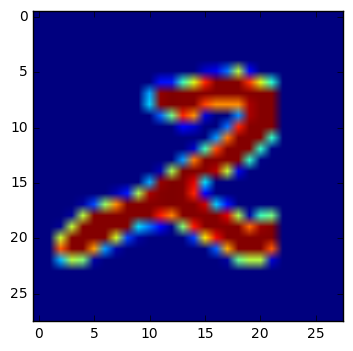

Label : 2


In [83]:
#Continued-understanding all dimensions in Keras MNIST dataset
print('X_train[0] shape:', X_train[0].shape)
rn1=random.randint(0, dataset_size)
rn2=random.randint(0, 27)
rn3=random.randint(0, 27)
print('randomnumber--',rn1,rn2,rn3)
print('X_train[rn1][rn2].shape---',X_train[rn1][rn2].shape)
#print('X_train[rn1][rn2]---',X_train[rn1][rn2])
print('y_train.shape---',y_train.shape)
print('y_train[rn1]---',y_train[rn1])
#print('X_train[rn)][random.randint(0, 28)][random.randint(0, 28)]---',X_train[rn][random.randint(0, 28)][random.randint(0, 28)])
print('X_train[rn1][:][:][0].shape----',X_train[rn1][:][:][:].shape)    
print('X_train[rn1][:][:][:].reshape(28,28).shape',X_train[rn1][:][:][:].reshape(28,28).shape)

fig=plt.figure()
plt.imshow(X_train[rn1][:][:][:].reshape(28,28))
plt.show()
print ('Label : {}'.format(y_train[rn1]))


## Concatenating 5 MNIST digits

This [forum discussion](https://discussions.udacity.com/t/step-1-concatenation-of-mnist/207676/5) was refered and the code was copied from there. 

1. Downloaded all idx.gz files by Chrome web browser to the current working directory. 
2. installed idx2numpy: sudo -H pip install idx2numpy
3. extracted gz files: gunzip -k  train-labels-idx1-ubyte.gz
4. Manually added idx extension to the file name in the current working directory. 

In [22]:
import idx2numpy
# read data and convert idx file to numpy array
ndarr = idx2numpy.convert_from_file('train-images-idx3-ubyte.idx')
labels_raw = idx2numpy.convert_from_file('train-labels-idx1-ubyte.idx')

dataset_size = ndarr.shape[0]/5
image_height = 28
image_width = 140 # 28*5 

def createSequences():
    dataset = np.ndarray(shape=(dataset_size, image_height, image_width),
                         dtype=np.float32)

    data_labels = []

    i = 0
    w = 0
    while i < dataset_size:
        temp = np.hstack(
            [ndarr[w], ndarr[w + 1], ndarr[w + 2], ndarr[w + 3], ndarr[w + 4]])
        dataset[i, :, :] = temp
        temp_str = (labels_raw[w], labels_raw[
                    w + 1], labels_raw[w + 2], labels_raw[w + 3], labels_raw[w + 4])
        data_labels.append(temp_str)
        w += 5
        i += 1

    np.array(data_labels)

    return dataset, data_labels


dataset, data_labels = createSequences()

In [36]:
print(ndarr.shape)
print(dataset.shape)
print(len(data_labels))

(60000, 28, 28)
(12000, 28, 140)
12000


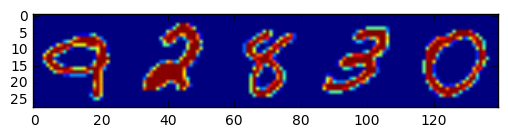

Label : (9, 2, 8, 3, 0)
dataset[n]--- [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
dataset[n].shape--- (28, 140)


In [64]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

def displaySequence(n):
    fig=plt.figure()
    plt.imshow(dataset[n])
    plt.show()
    print ('Label : {}'.format(data_labels[n]))
    

#display random sample to check if data is ok after creating sequences
n=random.randint(0, dataset_size)
displaySequence(n)

print('dataset[n]---',dataset[n])
print('dataset[n].shape---',dataset[n].shape)

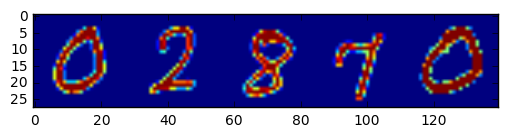

Label : (0, 2, 8, 7, 0)


In [37]:
displaySequence(random.randint(0, dataset_size))